In [106]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand 
import matplotlib.pyplot as plt
np.random.seed(42)

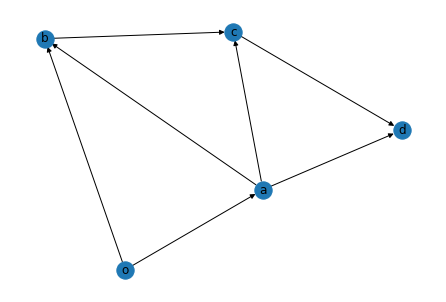

In [107]:
Lambda = np.array([[0,2/3,1/3,0,0],
                [0,0,1/4,1/4,2/4],
                [0,0,0,1,0],
                [0,0,0,0,1],
                [0,0,0,0,0]])
G = nx.DiGraph()
G.add_weighted_edges_from([('o','a',2/3), ('o','b',1/3), ('a','b',1/4), ('a','c',1/4), ('a', 'd', 2/4), ('b','c',1), ('c','d',1)])
nx.draw(G, with_labels=True)

In [108]:
w = np.sum(Lambda, axis = 1)
w_star = np.max(w)
P_bar = Lambda / w_star 
P_bar = P_bar + np.diag(np.ones(len(w)) - np.sum(P_bar, axis = 1))
print('P_bar:\n',P_bar)
values,vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar / np.sum(pi_bar)
print("pi_bar = ", pi_bar)
Q_cum = np.cumsum(P_bar, axis = 1)
print('Q_cum = \n', Q_cum)

P_bar:
 [[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.25       0.25       0.5       ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]]
pi_bar =  [0. 0. 0. 0. 1.]
Q_cum = 
 [[0.         0.66666667 1.         1.         1.        ]
 [0.         0.         0.25       0.5        1.        ]
 [0.         0.         0.         1.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]]


In [109]:
node_map_inv = dict(enumerate(G.nodes))
node_map = {v: k for k, v in node_map_inv.items()}

In [110]:
#Point A1

In [111]:
input_rate = 1

In [112]:
num_particles = 0
n_enter = 0
part_dist_time = np.array(np.zeros(len(G.nodes)))
transition_times = [0]
elapsed_time = 0
next_input = 0
node_dist = np.zeros(len(G.nodes))

while elapsed_time < 60:
    #when the graph is empty, the system must wait until a particle enters the system
    if num_particles == 0: 
        t_next = - np.log(np.random.rand()) / input_rate 
        next_input = 0
        elapsed_time += t_next
        node_dist[0] = 1
        num_particles += 1
        n_enter += 1
        part_dist_time = np.column_stack((part_dist_time,node_dist))
        transition_times.append(elapsed_time)
        continue
        
    #clock to determine when a particle enters the system
    if next_input <= 0:
        next_input += - np.log(np.random.rand()) / input_rate
                                                            
                                                            
        num_particles += 1
        n_enter += 1
        node_dist[0] += 1
        
    #the system clock is equal to the number of particles
    sys_clock = num_particles                      
    t_next = -np.log(np.random.rand())/sys_clock     
    elapsed_time += t_next
    next_input -= t_next

    
    Node_cum = np.cumsum(node_dist)
    node_chosen = np.argwhere(Node_cum >= np.random.rand() * sys_clock)[0][0]
    #the node 'd' or the exit node
    if node_chosen == 4:
        num_particles -= 1
        node_dist[4] -= 1
        part_dist_time = np.column_stack((part_dist_time,node_dist))
        transition_times.append(elapsed_time)
        continue
        
    #compute the next visited node xi by chosing at random a neighbor of the current one, accordingly to P_bar continuous time distribution
    xi = np.argwhere(Q_cum[node_chosen] >= np.random.rand())[0][0]
    node_dist[node_chosen] -= 1
    node_dist[xi] += 1
    part_dist_time = np.column_stack((part_dist_time, node_dist))
    transition_times.append(elapsed_time)

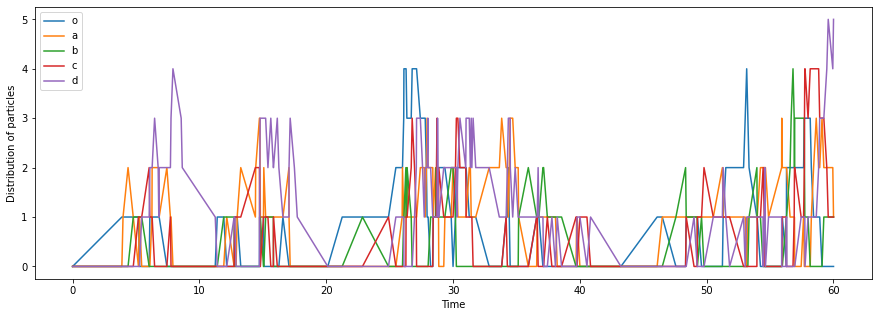

In [113]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5)) 
for node in range(len(G)):
    plt.plot(transition_times,part_dist_time[node].T,label=node_map_inv[node])
ax.legend()
plt.xlabel('Time')
plt.ylabel('Distribution of particles')
plt.legend()

In [114]:
#Point A2

In [115]:
input_rate = 100

In [116]:
num_particles = 0
n_enter = 0
part_dist_time = np.array(np.zeros(len(G.nodes)))
transition_times = [0]
elapsed_time = 0
next_input = 0
node_dist = np.zeros(len(G.nodes))

while elapsed_time < 60:
    
    #when the graph is empty, the system must wait until a particle enters the system
    if num_particles == 0: 
        t_next = -np.log(np.random.rand())/input_rate
        next_input = 0
        elapsed_time += t_next
        node_dist[0] = 1
        num_particles += 1
        n_enter += 1
        part_dist_time = np.column_stack((part_dist_time,node_dist))
        transition_times.append(elapsed_time)
        continue

     #clock to determine when a particle enters the system
    if next_input <= 0:
        next_input += -np.log(np.random.rand())/input_rate
        num_particles += 1
        n_enter += 1
        node_dist[0] += 1

    #the system clock is equal to the number of particles
    sys_clock = num_particles
    t_next = -np.log(np.random.rand())/sys_clock
    elapsed_time += t_next
    next_input -= t_next
    
    Node_cum = np.cumsum(node_dist)
    node_chosen = np.argwhere(Node_cum >= np.random.rand()*sys_clock)[0][0]
    
    #the node 'd' or the exit node
    if node_chosen == 4:
        num_particles -= 1
        node_dist[4] -= 1
        part_dist_time = np.column_stack((part_dist_time,node_dist))
        transition_times.append(elapsed_time)
        continue
    
    #compute the next visited node xi by chosing at random a neighbor of the current one, accordingly to P_bar continuous time distribution
    xi = np.argwhere(Q_cum[node_chosen] >= np.random.rand())[0][0]

    node_dist[node_chosen] -= 1
    node_dist[xi] += 1
    part_dist_time = np.column_stack((part_dist_time,node_dist))
    transition_times.append(elapsed_time)

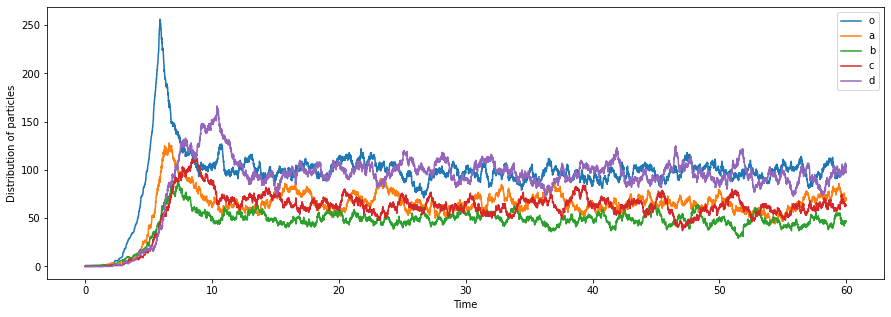

In [117]:
fig, ax = plt.subplots(figsize=(15,5)) 
for node in range(len(G)):
    plt.plot(transition_times,part_dist_time[node].T,label=node_map_inv[node])
ax.legend()
plt.xlabel('Time')
plt.ylabel('Distribution of particles')
plt.legend()

In [118]:
#Point B1

In [119]:
input_rate = 1
system_rate = 1
simulation_time = 60
movement_time = 0

In [120]:
num_particles = 0
n_enter = 0
part_dist_time = np.array(np.zeros(len(G.nodes)))
transition_times = [0]
elapsed_time = 0
next_input = 0

class NodeClock:
    
    def __init__(self, node_id, rate, initial_time=0, particles = 0, input_node = False):
        self.node_id = node_id
        self.rate = rate
        self.total_time = initial_time
        self.ticks = [initial_time]
        self.elapsing_time = [initial_time]
        self.elapsed_ticks = []
        self.external_times = []
        self.emissions = []
        self.in_node = input_node
        
        if not input_node:
            self.particles = particles
            self.particles_t = [particles]
            self.external_times_particles = []
 
    def tick(self):
        t = -np.log(np.random.rand())/self.rate
        self.total_time += t
        self.ticks.append(t)
        self.elapsing_time.append(self.total_time)
        return t
    
    def tick_until(self, stop_time):
        while self.total_time < stop_time:
            self.tick()
        return self.ticks
        
    def move(self):
        exit = 0
        if self.particles >= 1:
            self.particles -= 1
            exit = 1
        self.particles_t.append(self.particles)
        return exit
    
    def add_particle(self):
        self.particles += 1

        
    def ext_tick(self, time):
        self.external_times.append(time)
        index = np.argwhere(np.array(self.elapsing_time) <= time)[-1][0]
        out = 0
        if self.elapsing_time[index] not in self.elapsed_ticks:
            if self.in_node:
                out = 1 #always entering if is input node
            else:
                out = self.move() #need to check if there are particles available
                self.particles_t.append(self.particles)
                
            self.elapsed_ticks.append(self.elapsing_time[index])
        if not self.in_node:
            self.external_times_particles.append(self.particles)
        self.emissions.append(out)
        return out
    
t_nexts = dict()
tt_nexts = []
nodes_clocks = dict()
input_node = NodeClock('input', input_rate, input_node = True)
input_times = input_node.tick_until(simulation_time)
tt_nexts.extend(input_times)

for i, node in enumerate(G.nodes):
    nc = NodeClock(node,system_rate)
    nodes_clocks[i] = nc

for i, nc in nodes_clocks.items():
    nc.tick_until(simulation_time)
    cum_ticks = nc.elapsing_time
    tt_nexts.extend(cum_ticks)

stt_nexts = sorted(tt_nexts)
ut = np.unique(stt_nexts)

for next_step in stt_nexts:
    insert = input_node.ext_tick(next_step)
    if insert > 0:
        nodes_clocks[0].add_particle()
        next_step += movement_time
    for idx,node in nodes_clocks.items():
        exiting = node.ext_tick(next_step)
        if exiting > 0:
            input_into = np.argwhere(Q_cum[idx] >= np.random.rand())[0][0]
            if input_into != 4:
                nodes_clocks[input_into].add_particle()
            next_step += movement_time
            
resuming = []
for i,node in nodes_clocks.items():
    resuming.append(np.array(node.external_times_particles))
    
resuming = np.array(resuming)

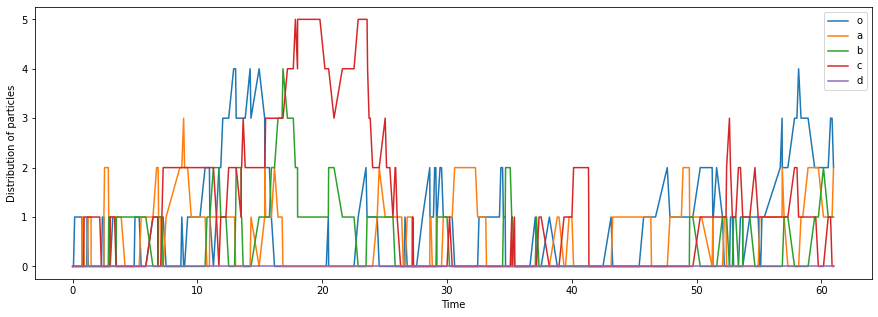

In [121]:
fig, ax = plt.subplots(figsize = (15,5)) 
for node in range(len(G)):
    plt.plot(stt_nexts, resuming[node], label = node_map_inv[node])
ax.legend()
plt.xlabel('Time')
plt.ylabel('Distribution of particles')
plt.legend()

In [122]:
#the fixed rate system is less stable than the proportional rate one.
#it is sufficient to set input_rate = 2 to find the divergence

In [123]:
input_rate = 2

In [124]:
num_particles = 0
n_enter = 0
part_dist_time = np.array(np.zeros(len(G.nodes)))
transition_times = [0]
elapsed_time = 0
next_input = 0

t_nexts = dict()
tt_nexts = []
nodes_clocks = dict()
input_node = NodeClock('input',input_rate,input_node=True)
input_times = input_node.tick_until(simulation_time)
tt_nexts.extend(input_times)

for i,node in enumerate(G.nodes):
    nc = NodeClock(node,system_rate)
    nodes_clocks[i] = nc

for i,nc in nodes_clocks.items():
    nc.tick_until(simulation_time)
    cum_ticks = nc.elapsing_time
    tt_nexts.extend(cum_ticks)

stt_nexts = sorted(tt_nexts)
ut = np.unique(stt_nexts)

for next_step in stt_nexts:
    insert = input_node.ext_tick(next_step)
    if insert > 0:
        nodes_clocks[0].add_particle()
        next_step += movement_time
    for idx,node in nodes_clocks.items():
        exiting = node.ext_tick(next_step)
        if exiting > 0:
            input_into = np.argwhere(Q_cum[idx] >= np.random.rand())[0][0]
            if input_into != 4:
                nodes_clocks[input_into].add_particle()
            next_step += movement_time
            
resuming = []
for i,node in nodes_clocks.items():
    resuming.append(np.array(node.external_times_particles))
    
resuming = np.array(resuming)

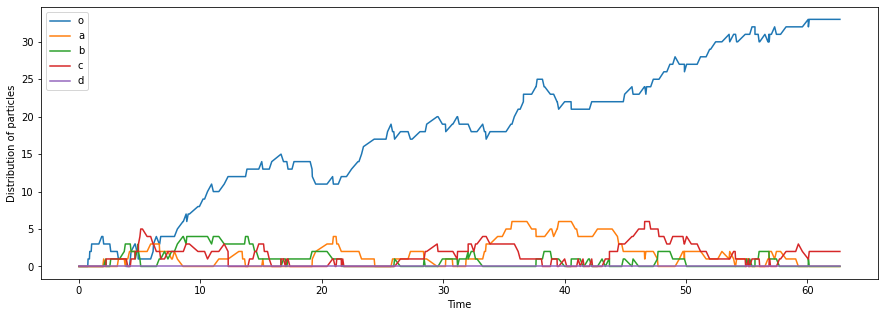

In [125]:
fig, ax = plt.subplots(figsize = (15, 5)) 
for node in range(len(G)):
    plt.plot(stt_nexts,resuming[node], label = node_map_inv[node])
ax.legend()
plt.xlabel('Time')
plt.ylabel('Distribution of particles')
plt.legend()